In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from glob import glob
from pathlib import Path

In [4]:
dir_ = './datasets/PlantVillage/'
dirs = Path(dir_)

In [5]:
import os

items = os.listdir(dir_)
items

['corn_blight',
 'corn_Common_Rust',
 'corn_Gray_Leaf_Spot',
 'corn_Healthy',
 'Pepper_bell_Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato_Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites',
 'Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Target_Spot']

In [6]:
os.path.join(dirs, items[1])

'datasets\\PlantVillage\\corn_Common_Rust'

In [8]:
for item in items:
    print(f'{item} -------------------------------------------- {len(os.listdir(os.path.join(dirs, item)))}')

corn_blight -------------------------------------------- 1146
corn_Common_Rust -------------------------------------------- 1306
corn_Gray_Leaf_Spot -------------------------------------------- 574
corn_Healthy -------------------------------------------- 1162
Pepper_bell_Bacterial_spot -------------------------------------------- 997
Pepper__bell___healthy -------------------------------------------- 1478
Potato_Early_blight -------------------------------------------- 1000
Potato___healthy -------------------------------------------- 152
Potato___Late_blight -------------------------------------------- 1000
Tomato_Bacterial_spot -------------------------------------------- 2127
Tomato_Early_blight -------------------------------------------- 1000
Tomato_Late_blight -------------------------------------------- 1909
Tomato_Leaf_Mold -------------------------------------------- 952
Tomato_Septoria_leaf_spot -------------------------------------------- 1771
Tomato_Spider_mites ----------

In [107]:
len(items)

1771

In [15]:
img_size = (180, 180)
batched_size = 32 

#loading the images into a dataset
dataset, val_ds = tf.keras.utils.image_dataset_from_directory(
    './datasets/PlantVillage/',
    labels = 'inferred',
    batch_size = batched_size,
    validation_split=0.1,
    shuffle = True,
    image_size= img_size,
    subset = 'both',
    seed = 40
)

Found 21173 files belonging to 17 classes.
Using 19056 files for training.
Using 2117 files for validation.


In [46]:
#getting the names of the classes
class_names = dataset.class_names
len(class_names)

17

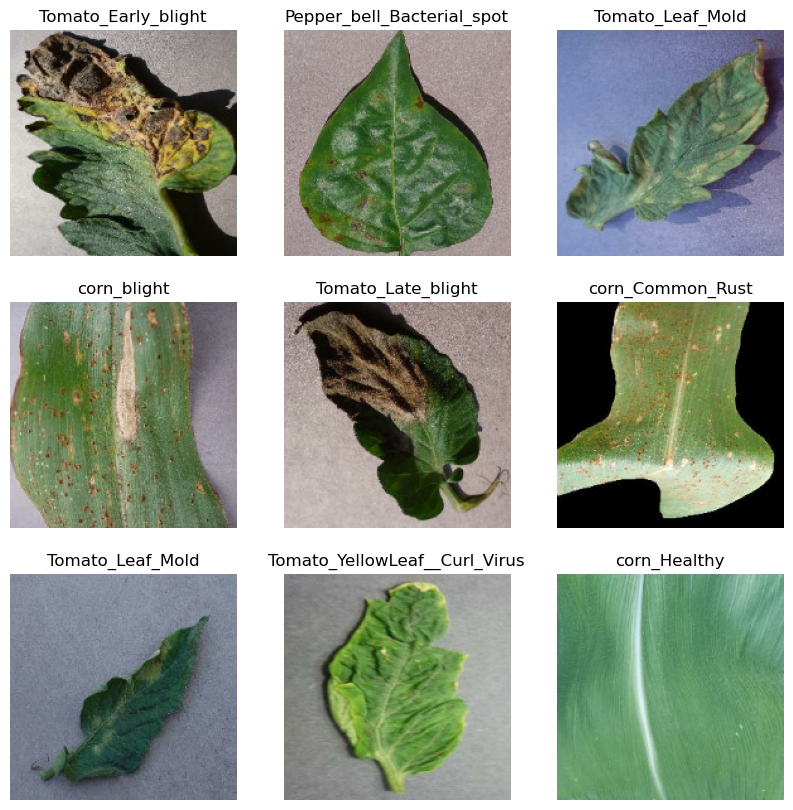

In [17]:
plt.figure(figsize=(10, 10))

for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.title(class_names[labels[i].numpy()])
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.axis('off')

In [19]:
#initializing rescaling and resizing
rescaling_and_resizing = Sequential([
    layers.experimental.preprocessing.Rescaling(1.0/255),
    layers.experimental.preprocessing.Resizing(180, 180)
])

In [62]:
#intializing image augmentation
augmentation = Sequential([
    layers.experimental.preprocessing.RandomFlip(),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomContrast(0.5),
    layers.experimental.preprocessing.RandomZoom(0.3)
])

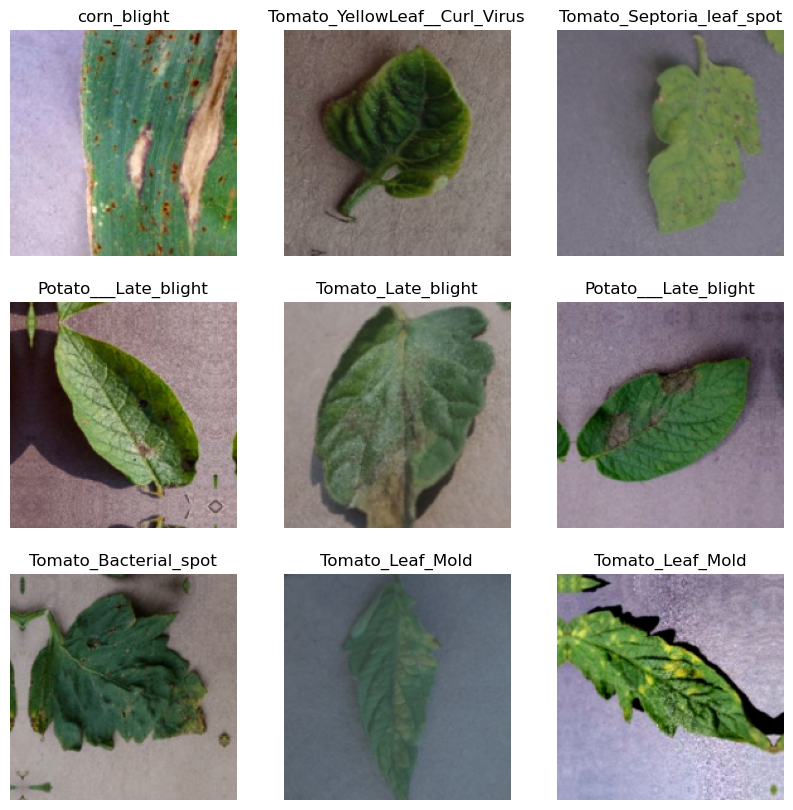

In [63]:
plt.figure(figsize=(10, 10))

for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.title(class_names[labels[i].numpy()])
        augmented_image = augmentation(images[i])
        plt.imshow(augmented_image.numpy().astype('uint8'))
        plt.axis('off')

In [44]:
int(len(dataset))

596

In [40]:
#a function to divide the dataset into training and testing data
def train_test_split(data, training = 0.8):
    train_size = int(len(dataset)*0.8)
    train = data.take(train_size)
    test = data.skip(train_size)
    
    return train, test

In [41]:
train_ds, test_ds = train_test_split(dataset)

In [42]:
len(train_ds)

476

In [43]:
len(test_ds)

120

In [59]:
train_ds = train_ds.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)

In [69]:
#setting the input shape to be taken by the model
image_shape = (batched_size,)+img_size+(3,)

In [74]:
#bulding the model
model = keras.Sequential([
        rescaling_and_resizing,
        augmentation,
        layers.Conv2D(filters=128, kernel_size=(3,3), input_shape=image_shape, activation = 'relu'),
        layers.MaxPool2D(pool_size=(2, 2), padding='same'),
        layers.Conv2D(filters=64, kernel_size=(3,3), activation = 'relu'),
        layers.MaxPool2D(pool_size=(2, 2), padding='same'),
        layers.Conv2D(filters=64, kernel_size=(3,3), activation = 'relu'),
        layers.MaxPool2D(pool_size=(2, 2), padding='same'),
        layers.Conv2D(filters=64, kernel_size=(3,3), activation = 'relu'),
        layers.MaxPool2D(pool_size=(2, 2), padding='same'),
        layers.Conv2D(filters=64, kernel_size=(3,3), activation = 'relu'),
        layers.MaxPool2D(pool_size=(2, 2), padding='same'),
        layers.Conv2D(filters=64, kernel_size=(3,3), activation = 'relu'),
        layers.MaxPool2D(pool_size=(2, 2), padding='same'),
        layers.Dropout(0.2),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(17, activation='softmax')
 ])

model.build(image_shape)

In [77]:
model.compile(
    optimizer='SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
model.fit()